## Plotting results of Lyapunov functions

In [1]:
import numpy as np
from numpy import *
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
def Plot3D(X, Y, V, r):
    # Plot Lyapunov functions  
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,V, rstride=5, cstride=5, alpha=0.5, cmap=cm.coolwarm)
    ax.contour(X,Y,V,10, zdir='z', offset=0, cmap=cm.coolwarm)
    
    # Plot Valid region computed by dReal
    theta = np.linspace(0,2*np.pi,50)
    xc = r*cos(theta)
    yc = r*sin(theta)
    ax.plot(xc[:],yc[:],'r',linestyle='--', linewidth=2 ,label='Valid region')
    plt.legend(loc='upper right')
    return ax

def Plotflow(Xd, Yd, t):
    # Plot phase plane 
    DX, DY = f([Xd, Yd],t)
    DX=DX/np.linalg.norm(DX, ord=2, axis=1, keepdims=True)
    DY=DY/np.linalg.norm(DY, ord=2, axis=1, keepdims=True)
    plt.streamplot(Xd,Yd,DX,DY, color=('gray'), linewidth=0.5,
                  density=0.5, arrowstyle='-|>', arrowsize=1.5)

### Inverted Pendulum

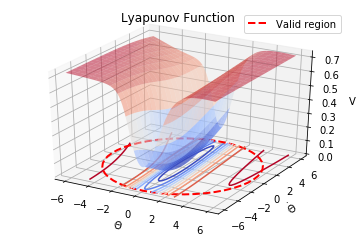

In [3]:
X = np.linspace(-6, 6, 100) 
Y = np.linspace(-6, 6, 100)
x1, x2 = np.meshgrid(X,Y)
V = tanh((0.1592191 + 0.6047373* tanh((-1.2250961 - 1.1751087 * x1 + 0.028802002 * x2)) - 0.69419956 * tanh((-0.81576663 + 0.02652748* x1 - 0.00072127824999999998 * x2)) - 1.1177092 * tanh((-0.53083205 + 0.043899357 * x1 - 0.0029811477000000002 * x2)) - 1.1329674000000001 * tanh((0.89248989999999995 - 0.55178492999999995 * x1 - 0.034781724 * x2)) + 0.77995585999999995 * tanh((0.93392560000000002 - 0.0067463684999999997 * x1 - 0.0067418180000000001 * x2)) - 0.26213419999999998 * tanh((1.0895116 + 0.44463265000000002 * x1 + 0.2598702 * x2))))-0.212
    
ax = Plot3D(x1,x2,V,6)
ax.set_xlabel('$\Theta$')
ax.set_ylabel('$\dot{\Theta}$')
ax.set_zlabel('V')
plt.title('Lyapunov Function')
plt.show()

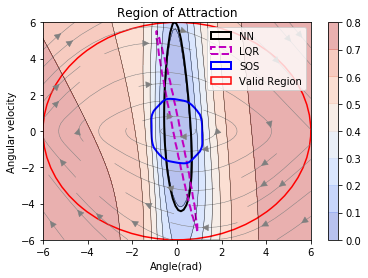

In [4]:
def f(y,t) :
    #parameters
    G = 9.81 
    L = 0.5  
    m = 0.15  
    b = 0.1   
    x1,x2 = y    
    Ku = np.matrix([[-23.586397, -5.314206]])
    u = (Ku.item(0)*x1 + Ku.item(1)*x2)
    dydt =[x2,  (m*G*L*sin(x1) + u - b*x2) / (m*L**2)]
    return dydt

ax = plt.gca()

# Lyapunov functions
V_SOS = x1**6*(2.11*x1**6 + 0.006847*x1**5*x2 + 0.0937*x1**4*x2**2 - 6.223e-8*x1**3*x2**3 - 1.307e-9*x1**2*x2**4 - 5.609e-9*x1**2 - 3.692e-9*x1*x2**5 - 5.893e-10*x2**6 + 2.132e-9*x2**2) + x1**5*x2*(0.006847*x1**6 + 0.0937*x1**5*x2 - 0.0271*x1**4*x2**2 - 1.307e-9*x1**3*x2**3 - 3.692e-9*x1**2*x2**4 + 2.132e-9*x1**2 - 5.893e-10*x1*x2**5 + 4.724e-10*x2**6 + 6.079e-10*x2**2) + x1**4*x2**2*(0.0937*x1**6 - 0.0271*x1**5*x2 + 0.03769*x1**4*x2**2 - 3.692e-9*x1**3*x2**3 - 5.893e-10*x1**2*x2**4 + 6.079e-10*x1**2 + 4.724e-10*x1*x2**5 + 2.836e-10*x2**6 + 1.731e-9*x2**2) + x1**3*x2**3*(-6.223e-8*x1**6 - 1.307e-9*x1**5*x2 - 3.692e-9*x1**4*x2**2 + 5.913*x1**3*x2**3 + 0.2135*x1**2*x2**4 + 2.11*x1**2 + 0.1824*x1*x2**5 + 0.009201*x2**6 + 0.006847*x2**2) + x1**2*x2**4*(-1.307e-9*x1**6 - 3.692e-9*x1**5*x2 - 5.893e-10*x1**4*x2**2 + 0.2135*x1**3*x2**3 + 0.1824*x1**2*x2**4 + 0.006847*x1**2 + 0.009201*x1*x2**5 + 0.01684*x2**6 + 0.0937*x2**2) + x1**2*(-5.609e-9*x1**6 + 2.132e-9*x1**5*x2 + 6.079e-10*x1**4*x2**2 + 2.11*x1**3*x2**3 + 0.006847*x1**2*x2**4 + 4.09*x1**2 + 0.0937*x1*x2**5 - 0.0271*x2**6 + 0.09225*x2**2) + x1*x2**5*(-3.692e-9*x1**6 - 5.893e-10*x1**5*x2 + 4.724e-10*x1**4*x2**2 + 0.1824*x1**3*x2**3 + 0.009201*x1**2*x2**4 + 0.0937*x1**2 + 0.01684*x1*x2**5 + 0.02061*x2**6 - 0.0271*x2**2) + x2**6*(-5.893e-10*x1**6 + 4.724e-10*x1**5*x2 + 2.836e-10*x1**4*x2**2 + 0.009201*x1**3*x2**3 + 0.01684*x1**2*x2**4 - 0.0271*x1**2 + 0.02061*x1*x2**5 + 0.01081*x2**6 + 0.03769*x2**2) + x2**2*(2.132e-9*x1**6 + 6.079e-10*x1**5*x2 + 1.731e-9*x1**4*x2**2 + 0.006847*x1**3*x2**3 + 0.0937*x1**2*x2**4 + 0.09225*x1**2 - 0.0271*x1*x2**5 + 0.03769*x2**6 + 0.2055*x2**2) - 17.0341495901499
V_lqr = 85.5250*x1**2 + 2*14.1518*x1*x2 + 2.4269*x2**2 #narrow
V = tanh((0.1592191 + 0.6047373* tanh((-1.2250961 - 1.1751087 * x1 + 0.028802002 * x2)) - 0.69419956 * tanh((-0.81576663 + 0.02652748* x1 - 0.00072127824999999998 * x2)) - 1.1177092 * tanh((-0.53083205 + 0.043899357 * x1 - 0.0029811477000000002 * x2)) - 1.1329674000000001 * tanh((0.89248989999999995 - 0.55178492999999995 * x1 - 0.034781724 * x2)) + 0.77995585999999995 * tanh((0.93392560000000002 - 0.0067463684999999997 * x1 - 0.0067418180000000001 * x2)) - 0.26213419999999998 * tanh((1.0895116 + 0.44463265000000002 * x1 + 0.2598702 * x2))))-0.212

# Vaild Region
C = plt.Circle((0, 0),6, color='r', linewidth=1.5, fill=False)
ax.add_artist(C)

# plot direction field
xd = np.linspace(-6, 6, 10) 
yd = np.linspace(-6, 6, 10)
Xd, Yd = np.meshgrid(xd,yd)
t = np.linspace(0,2,100)
Plotflow(Xd, Yd, t) 


ax.contour(X,Y,V-0.11,0,linewidths=2, colors='k')
ax.contour(X,Y,V_lqr-2.6,0,linewidths=2, colors='m',linestyles='--')
ax.contour(X,Y,V_SOS,0,linewidths=2, colors='b')


ax.contour(x1,x2,V,8,linewidths=0.4, colors='k')
c1 = ax.contourf(x1,x2,V,8,alpha=0.4,cmap=cm.coolwarm)
plt.colorbar(c1)

plt.title('Region of Attraction')
plt.legend([plt.Rectangle((0,0),1,2,color='k',fill=False,linewidth = 2),plt.Rectangle((0,0),1,2,color='m',fill=False,linewidth = 2,linestyle='--'),plt.Rectangle((0,0),1,2,color='b',fill=False,linewidth = 2),C]\
           ,['NN','LQR','SOS','Valid Region'],loc='upper right')

plt.xlabel('Angle(rad)')
plt.ylabel('Angular velocity')
plt.show()

### Circle path following ( kinematic bicycle model )

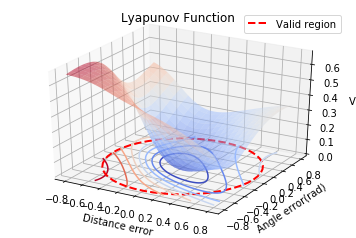

In [5]:
x = np.linspace(-0.8, 0.8, 100)
y = np.linspace(-0.8, 0.8, 100)
x1, x2 = np.meshgrid(x,y)
V = tanh((0.099664619999999995 + 0.6251369 * tanh((-1.2775723999999999 - 2.5249655 * x1 - 0.18407556 * x2)) - 1.0490067000000001 * tanh((-0.46410936000000003 - 0.47741896 * x1 - 0.69643679999999997 * x2)) - 1.0708085000000001 * tanh((-0.3698631 - 0.52394079999999998 * x1 - 0.58617014000000001 * x2)) + 0.46437746000000002 * tanh((0.91936094000000002 - 0.023182843000000002 * x1 - 0.50320260000000006 * x2)) + 0.70194889999999999 * tanh((0.97582674000000003 - 0.062661019999999998 * x1 - 0.56203824000000002 * x2)) - 1.1286860000000001 * tanh((1.3282121 + 1.3561938 * x1 + 2.5183802000000002 * x2))))-0.27
ax = Plot3D(x1,x2,V,0.8)
ax.set_xlabel('Distance error')
ax.set_ylabel('Angle error(rad)')
ax.set_zlabel('V')
plt.title('Lyapunov Function')
plt.show()

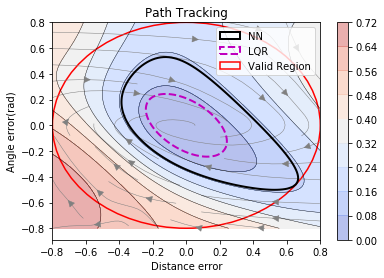

In [6]:
def f(y,t):
    v = 6
    L = 1
    Ku = np.matrix([-0.8471 , -1.6414])  
    x1,x2 = y
    u = Ku.item(0)*x1 + Ku.item(1)*x2
    dydt = [v*sin(x2),
            v*tan(u)/L]
    return dydt

ax = plt.gca()

# Lyapunov functions 
V_lqr = 0.2773*x1**2 + 2*0.1412*x1*x2 + 0.2736*x2**2

# Vaild Region
C = plt.Circle((0, 0),0.8, color='r', linewidth=1.5, fill=False, label='ROA')
ax.add_artist(C)

# plot direction field
xd = np.linspace(-0.8, 0.8, 10) 
yd = np.linspace(-0.8, 0.8, 10)
Xd, Yd = np.meshgrid(xd,yd)
t = np.linspace(0,2,100)
Plotflow(Xd, Yd, t) 

ax.contour(x1,x2,V_lqr-0.01200,0,linewidths=2, colors='m',linestyles='--')
ax.contour(x1,x2,V-0.15,0,linewidths=2, colors='k')
ax.contour(x1,x2,V,8,linewidths=0.4, colors='k')
c1 = ax.contourf(x1,x2,V,8, alpha=0.4,cmap=cm.coolwarm)
plt.colorbar(c1)

plt.title('Region of Attraction')
plt.title('Path Tracking')
plt.legend([plt.Rectangle((0,0),1,2,color='k',fill=False,linewidth = 2),plt.Rectangle((0,0),1,2,color='m',fill=False,linewidth = 2,linestyle='--'),C],['NN','LQR','Valid Region'],loc='upper right')
plt.xlabel('Distance error')
plt.ylabel('Angle error(rad)')
plt.show()